In [1]:
import os

import matplotlib.pyplot as plt
import numpy as np
import torch

from neural_verification import GeneralRNNConfig, GeneralRNN

In [2]:
from eval import configs

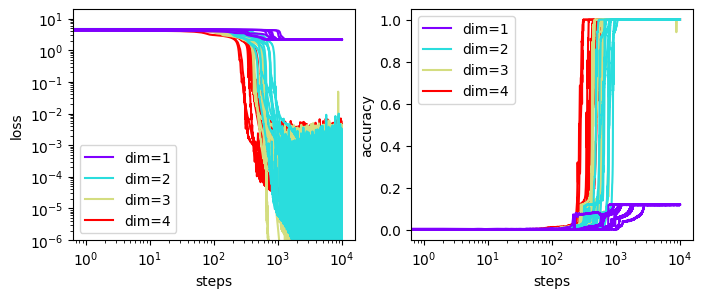

In [4]:
plt.figure(figsize=(8, 3))

plt.subplot(1, 2, 1)
colors = plt.cm.rainbow(np.linspace(0, 1, 4)) # since we have 4 different dimensions
for i in range(len(configs)):
    args = torch.load(f"results/{i}/args.pt")
    metrics = torch.load(f"results/{i}/metrics.pt")
    dim = args['hidden_dim']
    seed = args['seed']
    plt.plot(metrics['train_steps'], metrics['train_losses'], label=f"dim={dim}" if seed == 0 else None, color=colors[dim-1], zorder=-dim)

plt.xscale('log')
plt.xlabel("steps")
plt.ylabel("loss")
plt.yscale('log')
plt.ylim(1e-6, None)
plt.legend()

plt.subplot(1, 2, 2)
colors = plt.cm.rainbow(np.linspace(0, 1, 4)) # since we have 4 different dimensions
for i in range(len(configs)):
    args = torch.load(f"results/{i}/args.pt")
    metrics = torch.load(f"results/{i}/metrics.pt")
    dim = args['hidden_dim']
    seed = args['seed']
    plt.plot(metrics['train_steps'], metrics['train_accuracies'], label=f"dim={dim}" if seed == 0 else None, color=colors[dim-1], zorder=-dim)

plt.xscale('log')
plt.xlabel("steps")
plt.ylabel("accuracy")
# plt.yscale('log')
plt.legend()

In [5]:
# find the model with the lowest test loss with dim = 2
best_i = None
best_loss = float('inf')
for i in range(len(configs)):
    args = torch.load(f"results/{i}/args.pt")
    metrics = torch.load(f"results/{i}/metrics.pt")
    dim = args['hidden_dim']
    seed = args['seed']
    if dim == 2:
        if metrics['test_losses'][-1] < best_loss:
            best_loss = metrics['test_losses'][-1]
            best_i = i
print(best_i)
print(best_loss)

16
0.0


In [12]:
args = torch.load(f"results/{best_i}/args.pt")
args

{'seed': 6,
 'input_dim': 1,
 'output_dim': 1,
 'hidden_dim': 2,
 'hidden_mlp_depth': 1,
 'hidden_mlp_width': 100,
 'output_mlp_depth': 1,
 'output_mlp_width': 100,
 'activation': 'ReLU',
 'steps': 10000,
 'lr': 0.001,
 'weight_decay': 0.0,
 'train_batch_size': 4096,
 'test_batch_size': 65536,
 'progress_bar': True,
 'dtype': 'float32',
 'save_dir': 'results/16'}

In [11]:
torch.load(f"results/{16}/metrics.pt")['test_losses'][-1]

0.0